In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = "/content/drive/MyDrive/Humans"
output_folder_stress = "/content/drive/MyDrive/Train/Stress"
output_folder_non_stress = "/content/drive/MyDrive/Train/Non Stress"

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications.vgg16 import preprocess_input

# Path to the "stress" and "non-stress" folders
path_stress = "/content/drive/MyDrive/Train/Stress"
path_non_stress = "/content/drive/MyDrive/Train/Non Stress"

# Image dimensions
img_width, img_height = 128, 128
crop_size = 50  # Update the crop size based on your requirements

# Load images from the "stress" folder
X_stress = []
y_stress = []
for file_name in os.listdir(path_stress):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(path_stress, file_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        img = img[crop_size:-crop_size, crop_size:-crop_size, :]  # Crop the image
        X_stress.append(img)
        y_stress.append(1)  # Stress label

# Load images from the "non-stress" folder
X_non_stress = []
y_non_stress = []
for file_name in os.listdir(path_non_stress):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(path_non_stress, file_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        img = img[crop_size:-crop_size, crop_size:-crop_size, :]  # Crop the image
        X_non_stress.append(img)
        y_non_stress.append(0)  # Non-stress label

# Combine stress and non-stress data
X = np.array(X_stress + X_non_stress)
y = np.array(y_stress + y_non_stress)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values and preprocess input using VGG16 preprocessing
X_train = preprocess_input(X_train.astype('float32'))
X_test = preprocess_input(X_test.astype('float32'))

# One-hot encode labels
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
y_test = to_categorical(le.transform(y_test))

# Define the CNN model with varying dropout rates
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height-2*crop_size, img_width-2*crop_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Dropout with varying rates
dropout_rates = [0.2, 0.3, 0.4, 0.5]
for dropout_rate in dropout_rates:
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
145/145 [==============================] - 16s 12ms/step - loss: 0.6724 - accuracy: 0.6150 - val_loss: 0.5422 - val_accuracy: 0.9177
Epoch 2/10
145/145 [==============================] - 2s 10ms/step - loss: 0.4887 - accuracy: 0.8769 - val_loss: 0.4181 - val_accuracy: 0.9177
Epoch 3/10
145/145 [==============================] - 1s 10ms/step - loss: 0.4049 - accuracy: 0.9287 - val_loss: 0.3568 - val_accuracy: 0.9177
Epoch 4/10
145/145 [==============================] - 1s 10ms/step - loss: 0.3660 - accuracy: 0.9287 - val_loss: 0.3258 - val_accuracy: 0.9177
Epoch 5/10
145/145 [==============================] - 1s 7ms/step - loss: 0.3320 - accuracy: 0.9287 - val_loss: 0.3075 - val_accuracy: 0.9177
Epoch 6/10
145/145 [==============================] - 1s 7ms/step - loss: 0.3199 - accuracy: 0.9287 - val_loss: 0.2982 - val_accuracy: 0.9177
Epoch 7/10
145/145 [==============================] - 1s 7ms/step - loss: 0.3057 - accuracy: 0.9287 - val_loss: 0.2924 - val_accuracy: 0.9177
E

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


37/37 [==============================] - 0s 2ms/step
Confusion Matrix:
[[   0   95]
 [   0 1059]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.92      1.00      0.96      1059

    accuracy                           0.92      1154
   macro avg       0.46      0.50      0.48      1154
weighted avg       0.84      0.92      0.88      1154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


37/37 [==============================] - 0s 3ms/step


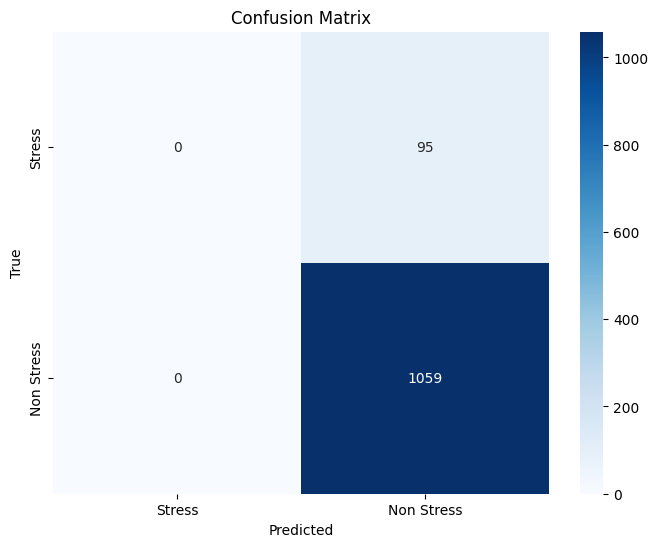


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.92      1.00      0.96      1059

    accuracy                           0.92      1154
   macro avg       0.46      0.50      0.48      1154
weighted avg       0.84      0.92      0.88      1154



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Stress', 'Non Stress'], yticklabels=['Stress', 'Non Stress'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Epoch 1/10
145/145 [==============================] - 1s 10ms/step - loss: 0.2844 - accuracy: 0.9287 - val_loss: 0.2857 - val_accuracy: 0.9177
Epoch 2/10
145/145 [==============================] - 2s 11ms/step - loss: 0.2787 - accuracy: 0.9287 - val_loss: 0.2853 - val_accuracy: 0.9177
Epoch 3/10
145/145 [==============================] - 1s 9ms/step - loss: 0.2685 - accuracy: 0.9287 - val_loss: 0.2848 - val_accuracy: 0.9177
Epoch 4/10
145/145 [==============================] - 1s 7ms/step - loss: 0.2699 - accuracy: 0.9287 - val_loss: 0.2846 - val_accuracy: 0.9177
Epoch 5/10
145/145 [==============================] - 1s 7ms/step - loss: 0.2659 - accuracy: 0.9287 - val_loss: 0.2845 - val_accuracy: 0.9177
Epoch 6/10
145/145 [==============================] - 1s 7ms/step - loss: 0.2654 - accuracy: 0.9287 - val_loss: 0.2844 - val_accuracy: 0.9177
Epoch 7/10
145/145 [==============================] - 1s 7ms/step - loss: 0.2635 - accuracy: 0.9287 - val_loss: 0.2844 - val_accuracy: 0.9177
Epoc

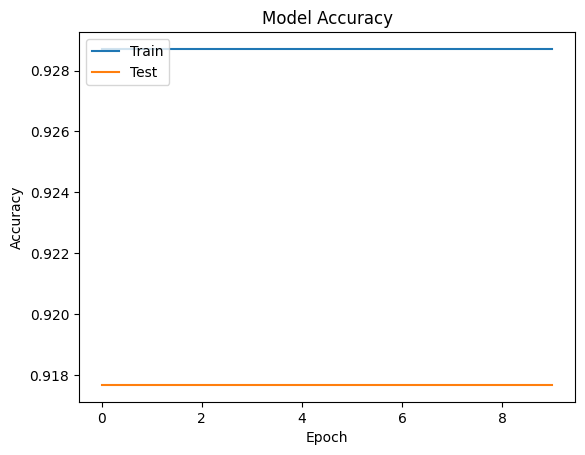

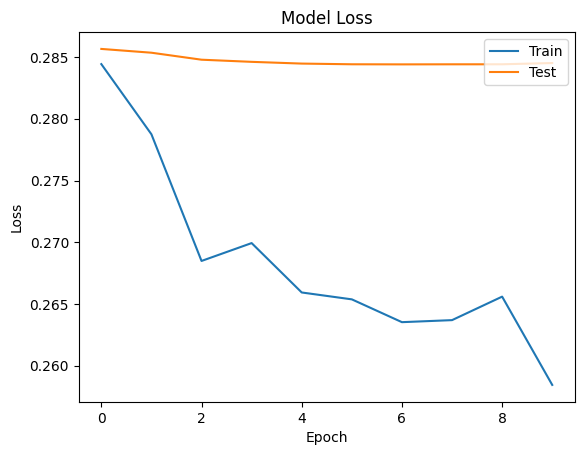

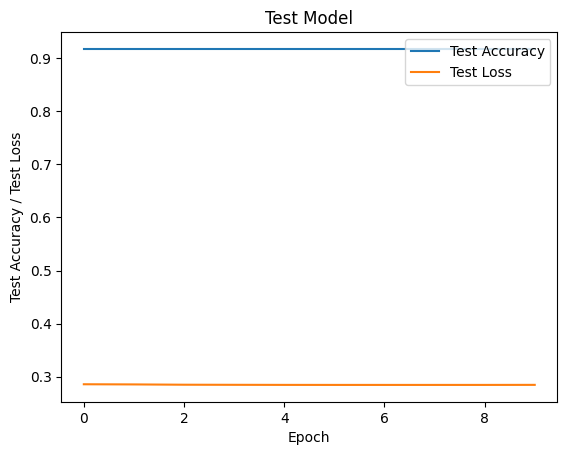

In [ ]:
# Train the model and capture the training history
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Plot the training history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the test accuracy and test loss
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test Model')
plt.ylabel('Test Accuracy / Test Loss')
plt.xlabel('Epoch')
plt.legend(['Test Accuracy', 'Test Loss'], loc='upper right')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Path to the "stress" and "non-stress" folders
path_stress = "/content/drive/MyDrive/Train/Stress"
path_non_stress = "/content/drive/MyDrive/Train/Non Stress"

# Image dimensions
img_width, img_height = 128, 128
crop_size = 50  # Update the crop size based on your requirements

# Load images and convert them to grayscale
X = []
y = []
for label, path in enumerate([path_stress, path_non_stress]):
    for file_name in os.listdir(path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(path, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))
            img = img[crop_size:-crop_size, crop_size:-crop_size]
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the LSTM format
input_shape = (X_train.shape[1], X_train.shape[2])  # (img_height-2*crop_size, img_width-2*crop_size)
X_train = X_train.reshape((X_train.shape[0], input_shape[0], input_shape[1]))
X_test = X_test.reshape((X_test.shape[0], input_shape[0], input_shape[1]))

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
y_test = to_categorical(le.transform(y_test))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(input_shape[0], input_shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
145/145 [==============================] - 7s 15ms/step - loss: 0.2632 - accuracy: 0.9265 - val_loss: 0.2832 - val_accuracy: 0.9177
Epoch 2/10
145/145 [==============================] - 1s 9ms/step - loss: 0.2597 - accuracy: 0.9287 - val_loss: 0.2820 - val_accuracy: 0.9177
Epoch 3/10
145/145 [==============================] - 2s 12ms/step - loss: 0.2599 - accuracy: 0.9287 - val_loss: 0.2897 - val_accuracy: 0.9177
Epoch 4/10
145/145 [==============================] - 2s 14ms/step - loss: 0.2563 - accuracy: 0.9289 - val_loss: 0.2828 - val_accuracy: 0.9177
Epoch 5/10
145/145 [==============================] - 2s 14ms/step - loss: 0.2557 - accuracy: 0.9294 - val_loss: 0.2777 - val_accuracy: 0.9194
Epoch 6/10
145/145 [==============================] - 1s 10ms/step - loss: 0.2521 - accuracy: 0.9294 - val_loss: 0.2757 - val_accuracy: 0.9177
Epoch 7/10
145/145 [==============================] - 1s 10ms/step - loss: 0.2561 - accuracy: 0.9291 - val_loss: 0.2837 - val_accuracy: 0.9177


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


37/37 [==============================] - 1s 4ms/step
Confusion Matrix:
[[1058    1]
 [  92    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1059
           1       0.75      0.03      0.06        95

    accuracy                           0.92      1154
   macro avg       0.83      0.52      0.51      1154
weighted avg       0.91      0.92      0.88      1154



37/37 [==============================] - 0s 4ms/step


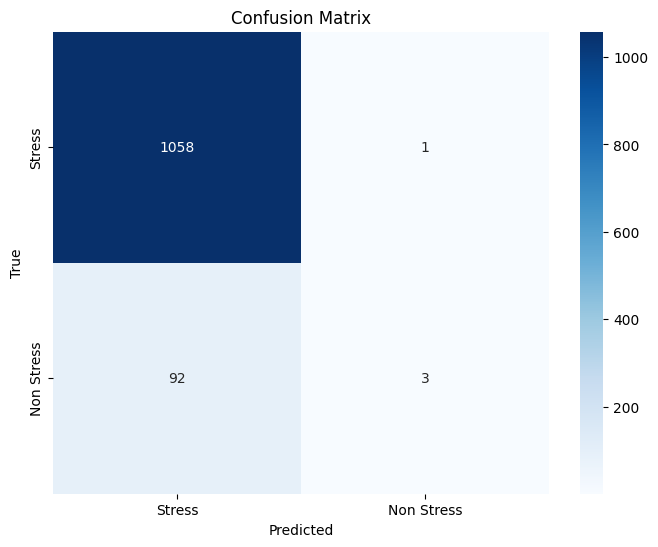


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1059
           1       0.75      0.03      0.06        95

    accuracy                           0.92      1154
   macro avg       0.83      0.52      0.51      1154
weighted avg       0.91      0.92      0.88      1154



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Stress', 'Non Stress'], yticklabels=['Stress', 'Non Stress'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


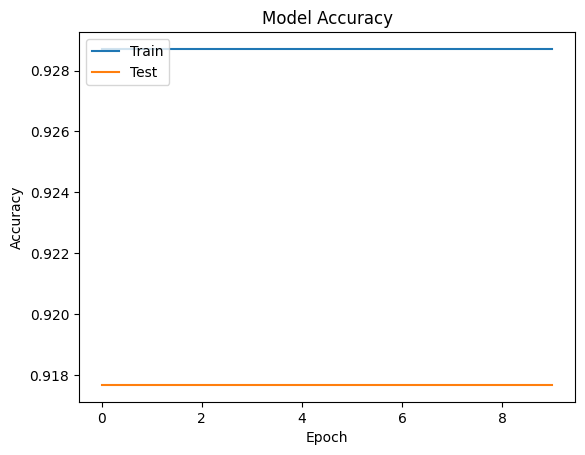

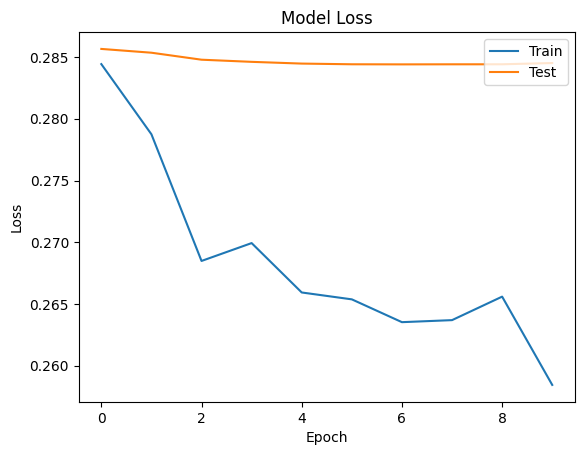

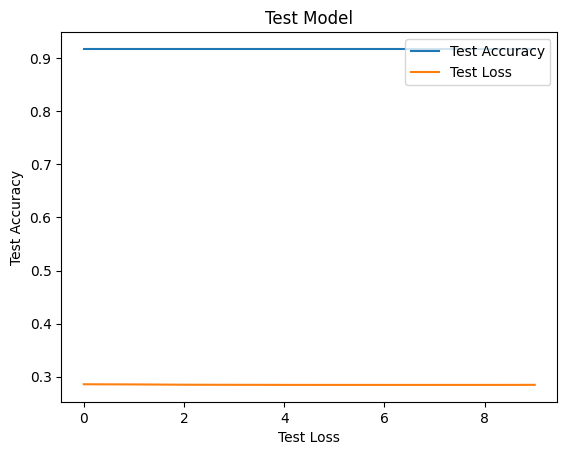

In [ ]:
# summarize history for accuracy
from matplotlib import pyplot as plt
# Plot the training history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the test accuracy and test loss
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test Model')
plt.ylabel('Test Accuracy')
plt.xlabel('Test Loss')
plt.legend(['Test Accuracy', 'Test Loss'], loc='upper right')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input  # Correct import

# Path to the "stress" and "non-stress" folders
path_stress = "/content/drive/MyDrive/Train/Stress"
path_non_stress = "/content/drive/MyDrive/Train/Non Stress"

# Image dimensions
img_width, img_height = 224, 224

# Load images
X = []
y = []
for label, path in enumerate([path_stress, path_non_stress]):
    for file_name in os.listdir(path):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(path, file_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess input using EfficientNetB7 preprocessing
X_train = preprocess_input(X_train)  # Correct preprocess_input
X_test = preprocess_input(X_test)  # Correct preprocess_input

# One-hot encode labels
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train))
y_test = to_categorical(le.transform(y_test))

# Load EfficientNet B7 model pretrained on ImageNet without the top classification layers
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create a new model on top of the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Freeze the layers of the base model
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


258076736/258076736 [==============================] - 13s 0us/step


Epoch 1/10
145/145 [==============================] - 104s 530ms/step - loss: 0.2224 - accuracy: 0.9304 - val_loss: 0.2099 - val_accuracy: 0.9255
Epoch 2/10
145/145 [==============================] - 71s 492ms/step - loss: 0.1592 - accuracy: 0.9447 - val_loss: 0.1746 - val_accuracy: 0.9341
Epoch 3/10
145/145 [==============================] - 71s 491ms/step - loss: 0.1383 - accuracy: 0.9484 - val_loss: 0.1851 - val_accuracy: 0.9341
Epoch 4/10
145/145 [==============================] - 63s 432ms/step - loss: 0.1163 - accuracy: 0.9595 - val_loss: 0.1394 - val_accuracy: 0.9454
Epoch 5/10
145/145 [==============================] - 71s 490ms/step - loss: 0.1029 - accuracy: 0.9653 - val_loss: 0.1330 - val_accuracy: 0.9575
Epoch 6/10
145/145 [==============================] - 71s 491ms/step - loss: 0.0914 - accuracy: 0.9664 - val_loss: 0.1181 - val_accuracy: 0.9593
Epoch 7/10
145/145 [==============================] - 71s 491ms/step - loss: 0.0786 - accuracy: 0.9720 - val_loss: 0.1157 - val_a

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


37/37 [==============================] - 18s 328ms/step
Confusion Matrix:
[[1055    4]
 [  29   66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1059
           1       0.94      0.69      0.80        95

    accuracy                           0.97      1154
   macro avg       0.96      0.85      0.89      1154
weighted avg       0.97      0.97      0.97      1154



37/37 [==============================] - 12s 328ms/step


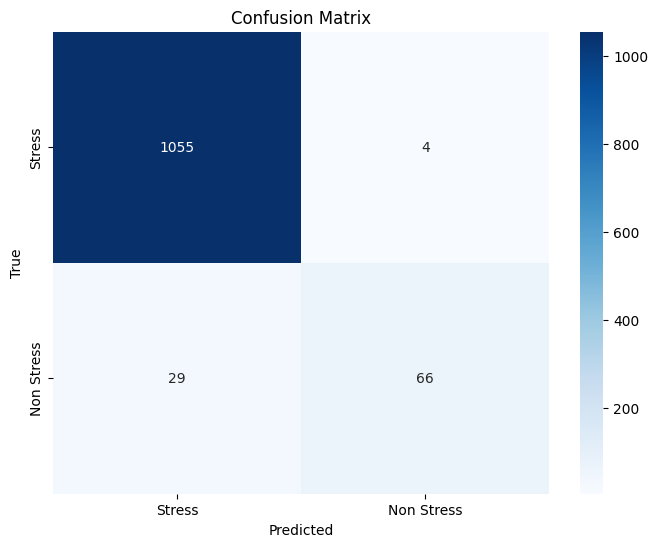


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1059
           1       0.94      0.69      0.80        95

    accuracy                           0.97      1154
   macro avg       0.96      0.85      0.89      1154
weighted avg       0.97      0.97      0.97      1154



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Stress', 'Non Stress'], yticklabels=['Stress', 'Non Stress'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


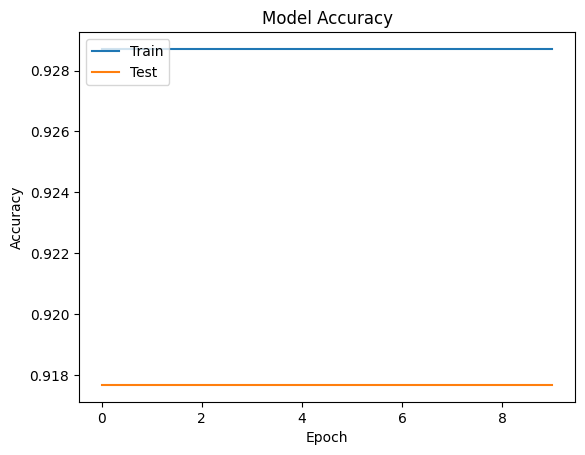

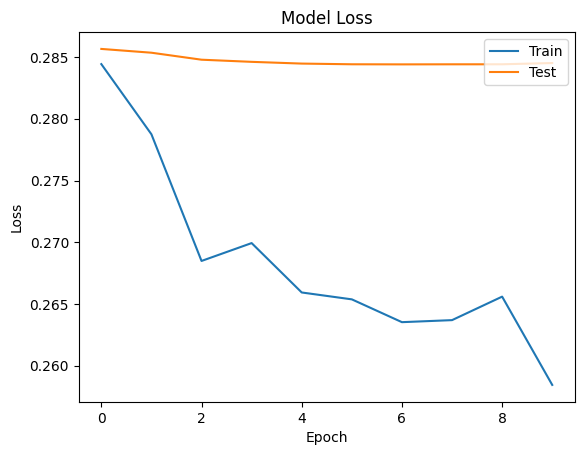

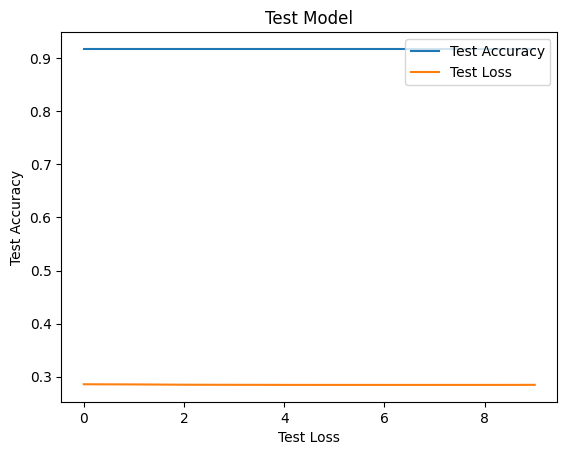

In [ ]:
# summarize history for accuracy
from matplotlib import pyplot as plt
# Plot the training history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the test accuracy and test loss
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test Model')
plt.ylabel('Test Accuracy')
plt.xlabel('Test Loss')
plt.legend(['Test Accuracy', 'Test Loss'], loc='upper right')
plt.show()